In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re,json,nltk

**Data preparation**

In [ ]:
data = pd.read_csv('/content/Male Celebrity  final 22-4-24.csv',encoding='UTF-8')
data.head()

,Comments,Sentiments,Like,Haha,Angry,Love,Care,Sad,Wow
0,ট্রেলার দেখলাম। এ এক নতুন জায়েদ খান। \nশুভ কাম...,Positive,3,3,0,2,0,0,0
1,উগান্ডা থেকে অস্কার প্রাপ্ত ছবি 🫣 সত্যি কথা আম...,Negative,4,5,0,0,0,0,0
2,"দর্শক থাকবো ৩ জন।\n একটা জায়েদ খান, আরেক টা জা...",Negative,3,27,0,0,0,0,0
3,কাউয়ায় ও পাখি 🐦\nজায়েদ খানেও নায়ক 🤩\nবাবা তোমা...,Negative,0,0,0,0,0,0,0
4,প্রচন্ড শীতের মধ্যে কাদামাটিতে লুটিয়ে এই ছবিট...,Negative,0,12,0,0,0,0,0


**Distribution**


Total Sentiment Counts:
Sentiments
Negative    223
Positive    142
Neutral     128
Name: count, dtype: int64


<ipython-input-3-068fdeb1881f>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


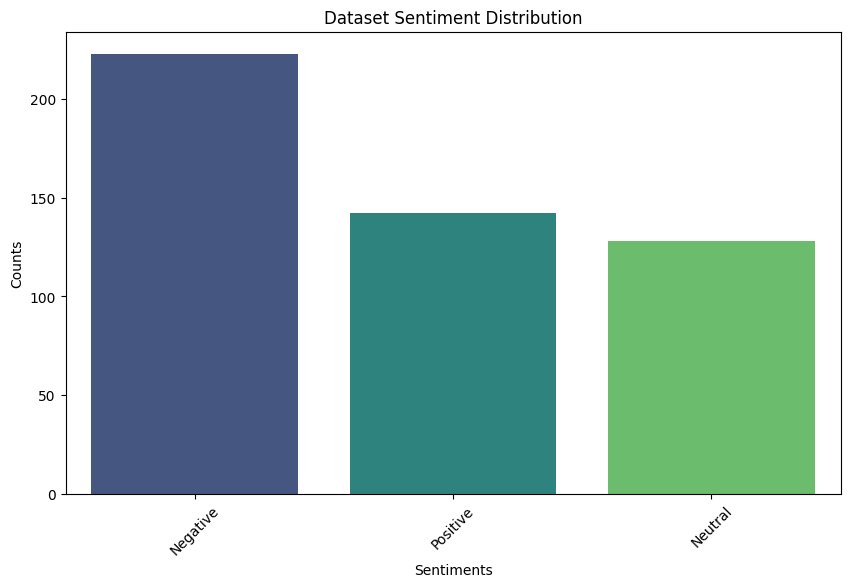

In [ ]:
sentiment_counts = data['Sentiments'].value_counts()

# Display the sentiment counts
print("Total Sentiment Counts:")
print(sentiment_counts)

# Plot the sentiment counts
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Dataset Sentiment Distribution')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

**Ratio**

Total Sentiment Counts:
Sentiments
Negative    223
Positive    142
Neutral     128
Name: count, dtype: int64


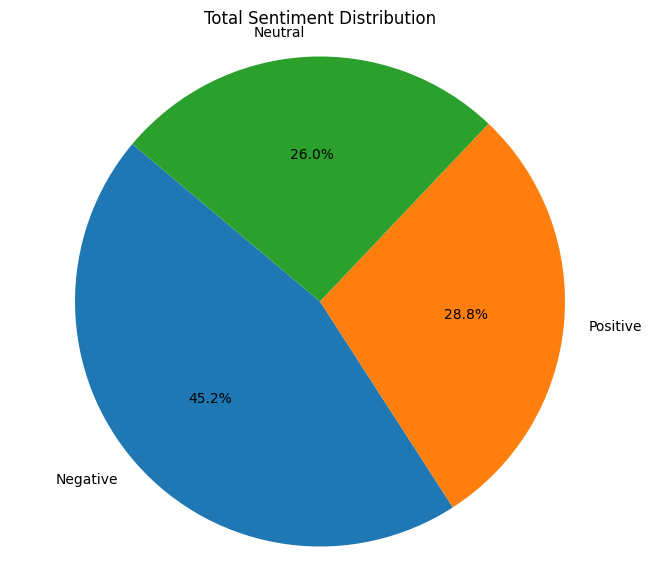

In [ ]:
# Calculate the total sentiment counts
sentiment_counts = data['Sentiments'].value_counts()

# Display the sentiment counts
print("Total Sentiment Counts:")
print(sentiment_counts)

# Plot the pie chart with equal aspect ratio
plt.figure(figsize=(8, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Sentiment Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

**Cleaning:**
1.Remove or handle any missing values.
2.Normalize and clean the text data (remove special characters, numbers, etc.).
3.Remove duplicates if necessary.
4.Tokenize and/or lemmatize the text data if required for further processing.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Original Data:
                                            Comments Sentiments  Like  Haha  \
0  ট্রেলার দেখলাম। এ এক নতুন জায়েদ খান। \nশুভ কাম...   Positive     3     3   
1  উগান্ডা থেকে অস্কার প্রাপ্ত ছবি 🫣 সত্যি কথা আম...   Negative     4     5   
2  দর্শক থাকবো ৩ জন।\n একটা জায়েদ খান, আরেক টা জা...   Negative     3    27   
3  কাউয়ায় ও পাখি 🐦\nজায়েদ খানেও নায়ক 🤩\nবাবা তোমা...   Negative     0     0   
4  প্রচন্ড শীতের মধ্যে কাদামাটিতে লুটিয়ে এই ছবিট...   Negative     0    12   

   Angry  Love  Care  Sad  Wow  
0      0     2     0    0    0  
1      0     0     0    0    0  
2      0     0     0    0    0  
3      0     0     0    0    0  
4      0     0     0    0    0  

Missing values in each column:
Comments      0
Sentiments    0
Like          0
Haha          0
Angry         0
Love          0
Care          0
Sad           0
Wow           0
dtype: int64

Cleaned Data:
                                            Comments Sentiments  Like  Haha  \
0   ট্রেলার দেখলাম এক জায়েদ খ

<ipython-input-5-6ca314feee64>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


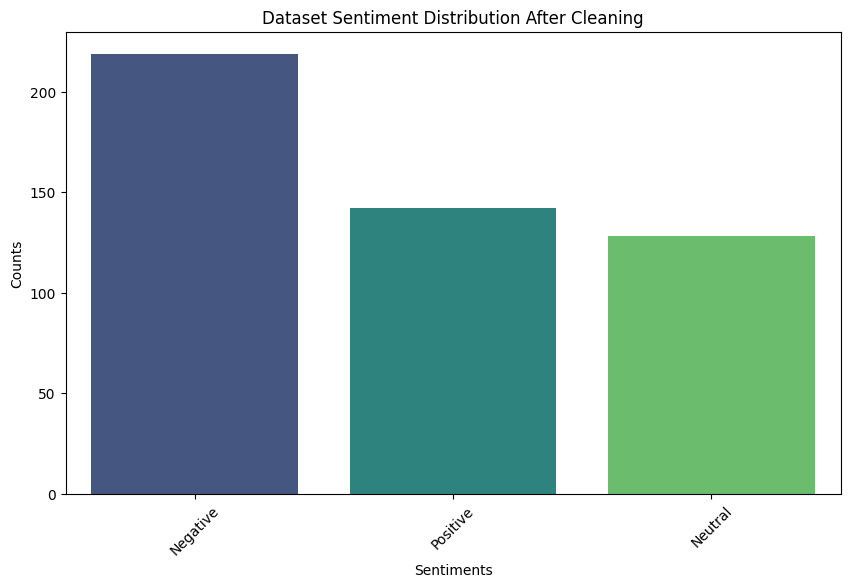

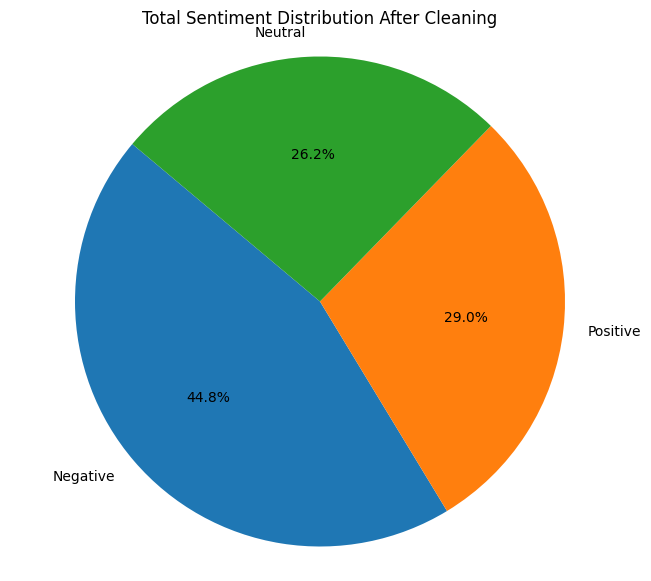

In [ ]:
from nltk.corpus import stopwords

# Download stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('bengali'))

# Load the dataset
data = pd.read_csv('/content/Male Celebrity  final 22-4-24.csv', encoding='UTF-8')

# Display the first few rows of the dataset
print("Original Data:")
print(data.head())

# Check for missing values
print("\nMissing values in each column:")
print(data.isnull().sum())

# Drop rows with missing values
data.dropna(inplace=True)

# Function to clean text
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^ঀ-৿a-zA-Z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Convert to lower case
    text = text.lower()
    return text

# Apply the cleaning function to the 'Comments' column
data['Comments'] = data['Comments'].apply(clean_text)

# Remove stop words
data['Comments'] = data['Comments'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))

# Remove duplicates if any
data.drop_duplicates(subset=['Comments'], inplace=True)

# Display the cleaned data
print("\nCleaned Data:")
print(data.head())

# Verify the changes
print("\nMissing values after cleaning:")
print(data.isnull().sum())

# Recalculate the sentiment counts after cleaning
sentiment_counts = data['Sentiments'].value_counts()

# Display the sentiment counts
print("\nTotal Sentiment Counts After Cleaning:")
print(sentiment_counts)

# Plot the sentiment counts
plt.figure(figsize=(10, 6))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Dataset Sentiment Distribution After Cleaning')
plt.xlabel('Sentiments')
plt.ylabel('Counts')
plt.xticks(rotation=45)
plt.show()

# Plot the pie chart with equal aspect ratio
plt.figure(figsize=(8, 7))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Total Sentiment Distribution After Cleaning')
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

**Word Frequencey using Zip's Law:**
1.Preprocess and clean the text data.
2.Tokenize the text into words.
3.Calculate word frequencies.
4.Rank the words by their frequencies.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


        Word  Frequency  Rank
98       ভাই         92     1
3      জায়েদ         79     2
4        খান         72     3
12       ছবি         40     4
76      ভালো         34     5
57        চর         31     6
130   সিনেমা         29     7
23      একটা         28     8
56     সোনার         24     9
40    জায়েদ         24    10
30      নায়ক         22    11
69     খানের         21    12
105    মানুষ         21    13
112     মুভি         20    14
74      সাথে         19    15
279  ডিগবাজি         18    16
121     হিরো         18    17
67       চাই         15    18
135      হয়ে         15    19
175   আপনাকে         15    20


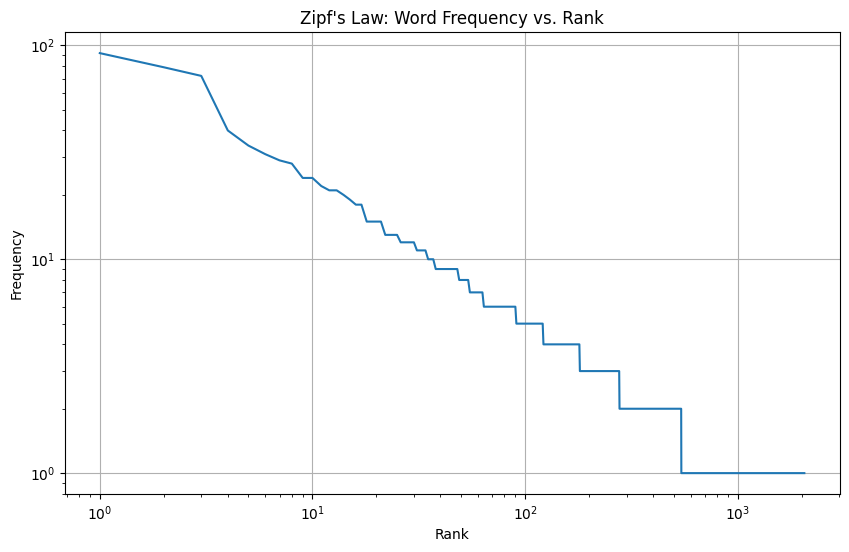

In [ ]:
import numpy as np
import pandas as pd
import re
import nltk
from collections import Counter
import matplotlib.pyplot as plt

# Download NLTK stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# Load Bengali stopwords
stop_words = set(stopwords.words('bengali'))

# Load the dataset
data = pd.read_csv('/content/Male Celebrity  final 22-4-24.csv', encoding='UTF-8')

# Function to clean and tokenize text
def clean_and_tokenize(text):
    # Ensure the text is a string
    text = str(text)
    # Remove special characters and numbers
    text = re.sub(r'[^ঀ-৿a-zA-Z\s]', '', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    # Convert to lower case
    text = text.lower()
    # Tokenize the text
    words = text.split()
    # Remove stopwords
    words = [word for word in words if word not in stop_words]
    return words

# Apply the function to the 'Comments' column and concatenate all tokens into a single list
all_words = []
data['Comments'].apply(lambda x: all_words.extend(clean_and_tokenize(x)))

# Calculate word frequencies
word_freq = Counter(all_words)

# Create a DataFrame for word frequencies
word_freq_df = pd.DataFrame(word_freq.items(), columns=['Word', 'Frequency'])

# Sort the DataFrame by frequency in descending order
word_freq_df.sort_values(by='Frequency', ascending=False, inplace=True)

# Assign ranks
word_freq_df['Rank'] = np.arange(1, len(word_freq_df) + 1)

# Display the DataFrame
print(word_freq_df.head(20))

# Plot word frequency vs. rank (Zipf's Law plot)
plt.figure(figsize=(10, 6))
plt.plot(word_freq_df['Rank'], word_freq_df['Frequency'])
plt.xscale('log')
plt.yscale('log')
plt.title("Zipf's Law: Word Frequency vs. Rank")
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()